In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [4]:

df = pd.read_csv("owid-covid-data.csv")
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
df.shape
df.info()
df.columns
df.describe()
df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166326 entries, 0 to 166325
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    166326 non-null  object 
 1   continent                                   156370 non-null  object 
 2   location                                    166326 non-null  object 
 3   date                                        166326 non-null  object 
 4   total_cases                                 163293 non-null  float64
 5   new_cases                                   163133 non-null  float64
 6   new_cases_smoothed                          161150 non-null  float64
 7   total_deaths                                145451 non-null  float64
 8   new_deaths                                  145487 non-null  float64
 9   new_deaths_smoothed                         143390 non-null  float64
 

weekly_icu_admissions                   160893
weekly_icu_admissions_per_million       160893
excess_mortality                        160630
excess_mortality_cumulative_absolute    160630
excess_mortality_cumulative             160630
                                         ...  
total_cases                               3033
population                                1075
iso_code                                     0
location                                     0
date                                         0
Length: 67, dtype: int64

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
india_df = df[df['location'] == "India"]

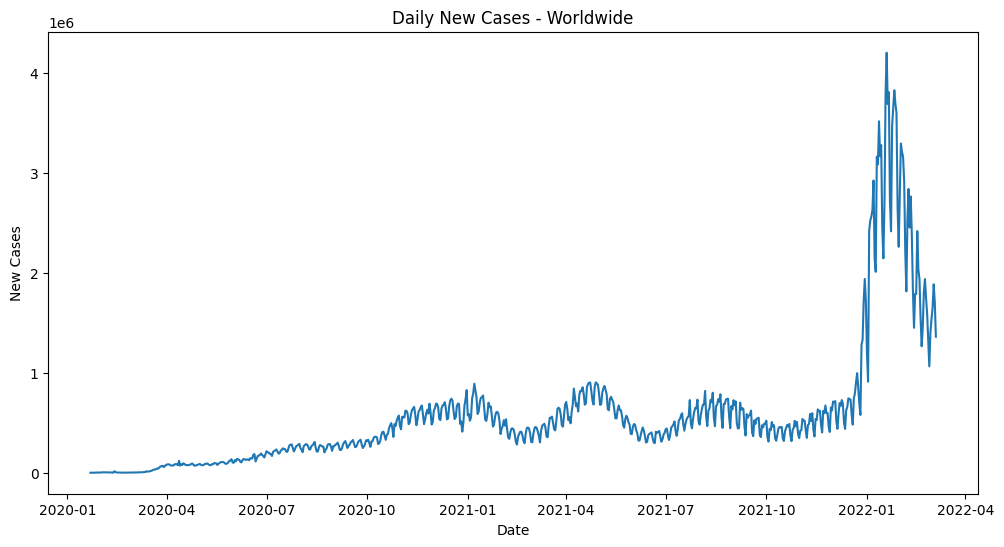

In [11]:
#New cases over time (World)

world_df = df[df['location'] == "World"]

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(world_df['date'], world_df['new_cases'])
plt.title("Daily New Cases - Worldwide")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.show()


C:\Users\soura\AppData\Local\Temp\ipykernel_8156\2097487912.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_df['new_cases_7day'] = world_df['new_cases'].rolling(7).mean()


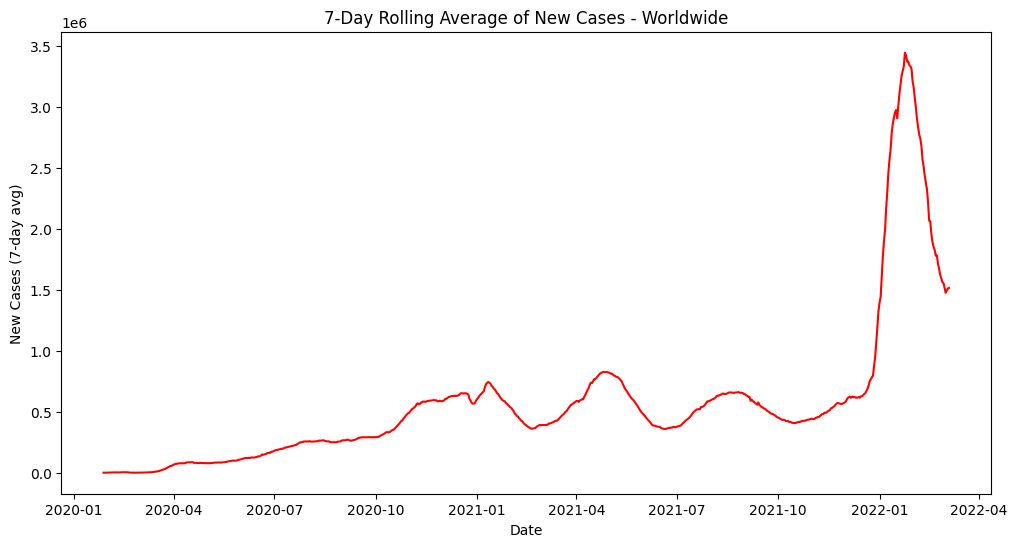

In [12]:
#Rolling average

world_df['new_cases_7day'] = world_df['new_cases'].rolling(7).mean()

plt.figure(figsize=(12,6))
plt.plot(world_df['date'], world_df['new_cases_7day'], color='red')
plt.title("7-Day Rolling Average of New Cases - Worldwide")
plt.xlabel("Date")
plt.ylabel("New Cases (7-day avg)")
plt.show()


        

In [13]:
india = df[df['location'] == "India"].copy()
india.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
69678,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
69679,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
69680,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
69681,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
69682,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN


In [14]:
india.info()
india.describe()
india.isnull().sum().sort_values(ascending=False).head(15)

<class 'pandas.core.frame.DataFrame'>
Index: 766 entries, 69678 to 70443
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    766 non-null    object        
 1   continent                                   766 non-null    object        
 2   location                                    766 non-null    object        
 3   date                                        766 non-null    datetime64[ns]
 4   total_cases                                 766 non-null    float64       
 5   new_cases                                   766 non-null    float64       
 6   new_cases_smoothed                          760 non-null    float64       
 7   total_deaths                                725 non-null    float64       
 8   new_deaths                                  723 non-null    float64       
 9   new_death

weekly_hosp_admissions_per_million         766
icu_patients                               766
icu_patients_per_million                   766
excess_mortality_cumulative_absolute       766
excess_mortality_cumulative                766
excess_mortality                           766
weekly_hosp_admissions                     766
weekly_icu_admissions_per_million          766
weekly_icu_admissions                      766
hosp_patients_per_million                  766
hosp_patients                              766
excess_mortality_cumulative_per_million    766
total_boosters_per_hundred                 715
total_boosters                             715
people_fully_vaccinated                    391
dtype: int64

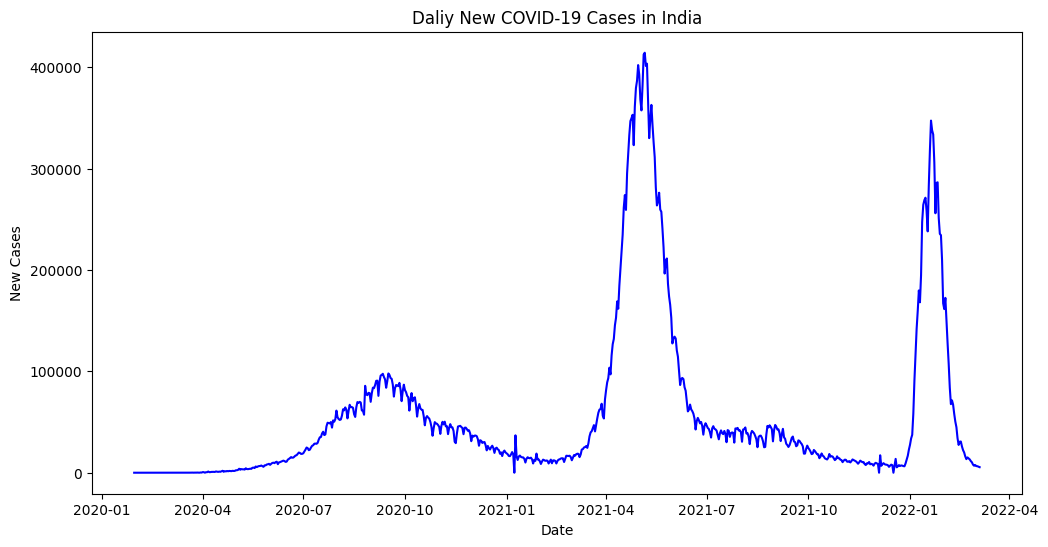

In [15]:
#New cases overtime in India

plt.figure(figsize=(12,6))
plt.plot(india['date'], india['new_cases'], color='blue')
plt.title('Daliy New COVID-19 Cases in India')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

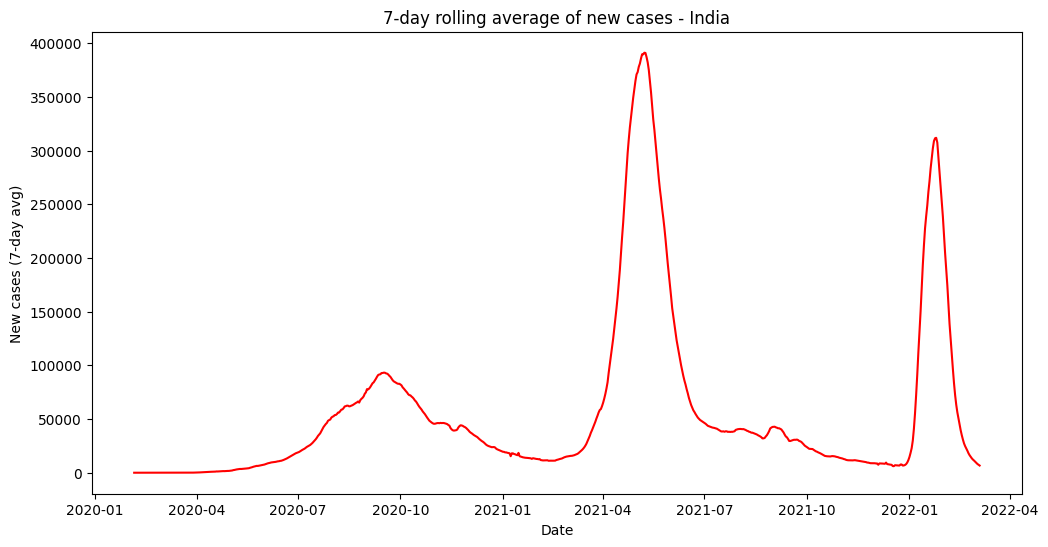

In [16]:
# 7 day rolling avg.

india['new_cases_7day'] = india['new_cases'].rolling(7).mean()

plt.figure(figsize=(12,6))
plt.plot(india['date'], india['new_cases_7day'], color='red')
plt.title('7-day rolling average of new cases - India')
plt.xlabel('Date')
plt.ylabel('New cases (7-day avg)')
plt.show()

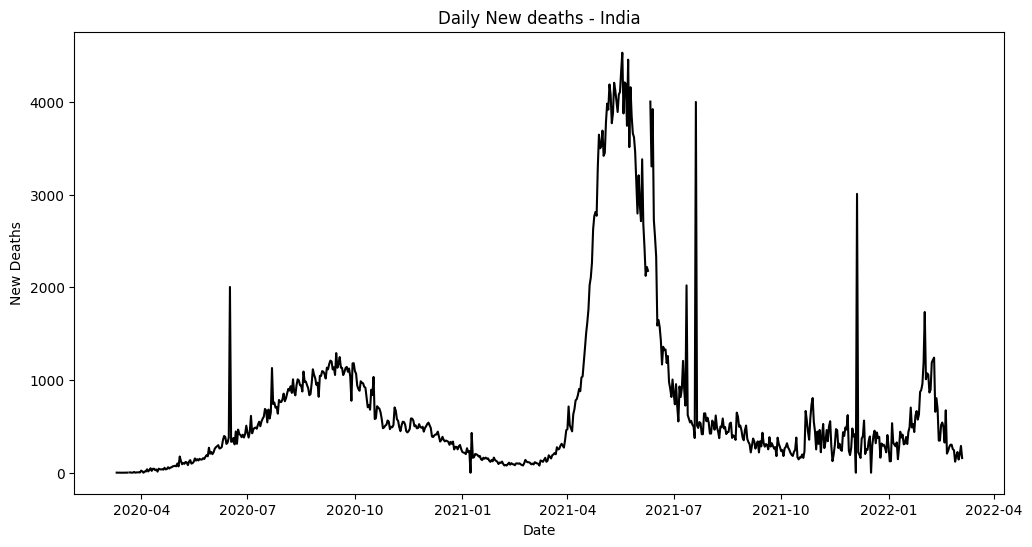

In [17]:
#Daily Deaths Trend

plt.figure(figsize=(12,6))
plt.plot(india['date'], india['new_deaths'], color='black')
plt.title('Daily New deaths - India')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.show()

In [18]:
#Vaccination Progress in India
india[['people_vaccinated', 'people_fully_vaccinated', 'total_vaccinations']].tail()


,people_vaccinated,people_fully_vaccinated,total_vaccinations
70439,965923463.0,791803734.0,1.776674e+09
70440,966125454.0,793112322.0,1.778254e+09
70441,966508496.0,795778169.0,1.781445e+09
70442,966810216.0,797997103.0,1.784081e+09
70443,967153861.0,800304849.0,1.786849e+09


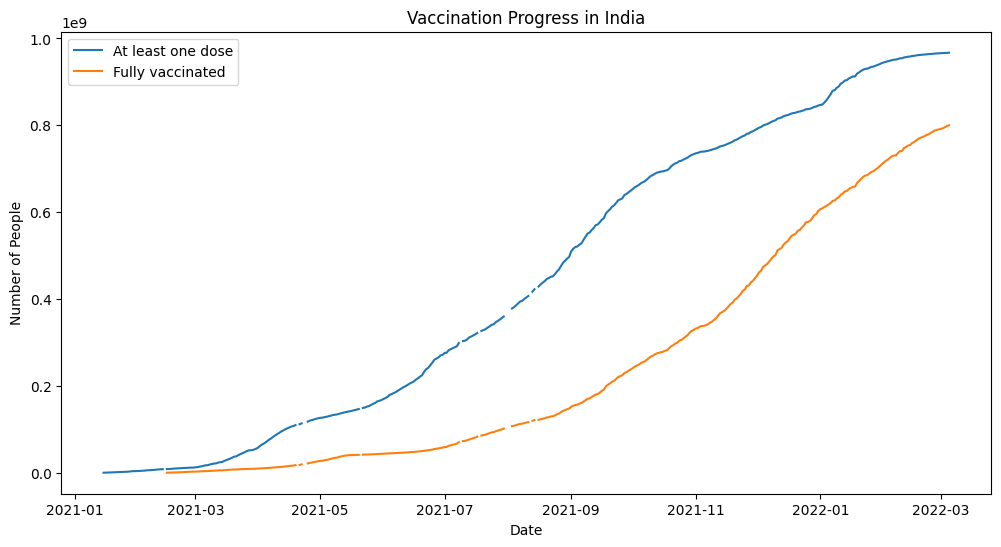

In [19]:
#Plot vaccination rollout

plt.figure(figsize=(12,6))
plt.plot(india['date'], india['people_vaccinated'], label='At least one dose')
plt.plot(india['date'], india['people_fully_vaccinated'], label='Fully vaccinated')
plt.title('Vaccination Progress in India')
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.legend()
plt.show()

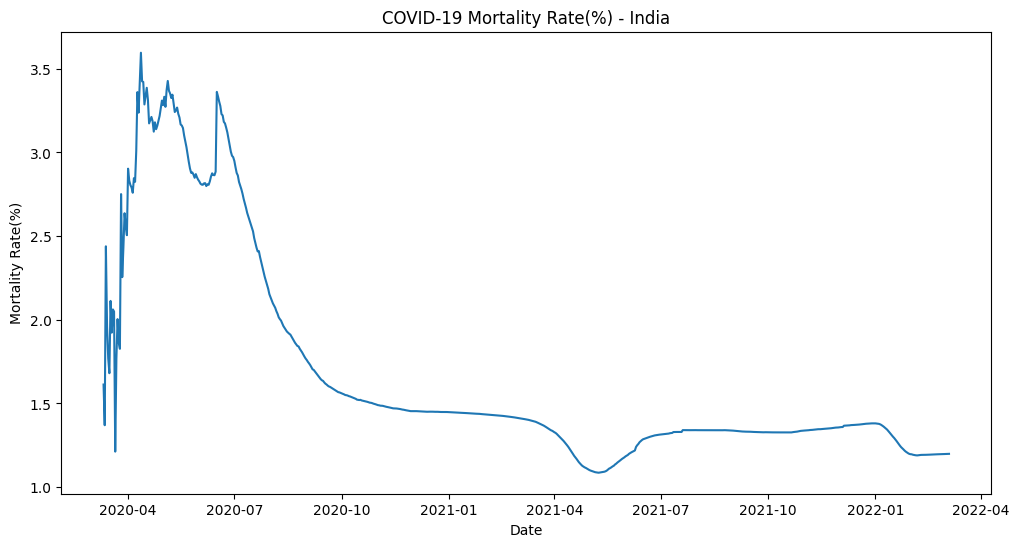

In [22]:
#Mortality Rate

india['mortality_rate'] = (india['total_deaths'] / india['total_cases'])*100

plt.figure(figsize=(12,6))
plt.plot(india['date'], india['mortality_rate'])
plt.title('COVID-19 Mortality Rate(%) - India')
plt.xlabel('Date')
plt.ylabel('Mortality Rate(%)')
plt.show()